In [1]:
#import csv from the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)
plt.style.use('ggplot')


df=pd.read_csv('../final.csv')
df[['SUB1','GENDER']].head()


,SUB1,GENDER
0,2,1
1,2,1
2,2,1
3,4,1
4,3,1


Chart for `DSM Diagnosis and Substance Abuse`

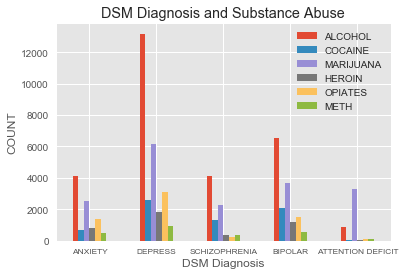

In [63]:
#DSMCRIT (later parts) and top 6 sub1
plt.figure()
df5 = df[df['SUB1'].isin([2,3,4,5,7,10])] #top 6 substances
df5 = df5[df5['DSMCRIT'].isin([14,15,16,17,18])] #

df5 = df5.groupby(['DSMCRIT'])['SUB1'].value_counts().unstack()#.reset_index(name="count")

df5.plot(kind='bar')
#print (df5.head(12))
#plt.title('Number of Substance by Year')

ax = plt.gca() # grab the current axis
ax.set(xlabel="DSM Diagnosis", ylabel="COUNT")
#ax.set_xticks([2,4,6]) # choose which x locations to have ticks
#ax.set_xticklabels(["ANXIETY DISORDER","DEPRESSIVE DISORDER","SCHIZOPHRENIA","BIPOLAR DISORDER","ATTENTION DEFICIT"]) 
ax.set_xticklabels(["ANXIETY","DEPRESS","SCHIZOPHRENIA","BIPOLAR","ATTENTION DEFICIT"]) 
plt.xticks(fontsize='small')
plt.xticks(rotation='horizontal')
plt.legend(['ALCOHOL', 'COCAINE', 'MARIJUANA', 'HEROIN', 'OPIATES','METH'])
plt.title('DSM Diagnosis and Substance Abuse')
plt.show()

In [13]:
print df['RACE'].value_counts()
df['ETHNIC'].value_counts()

 5     6020097
 4     1796870
 20     713232
 2      205719
 21     130072
-9      113255
 13      55498
 23      40447
 1       21158
 3        8729
Name: RACE, dtype: int64


 5    7695927
 2     417115
 1     353561
 4     252831
 6     231613
-9     129886
 3      24144
Name: ETHNIC, dtype: int64

Chart for `Selected states and Substance Abuse` (Working)

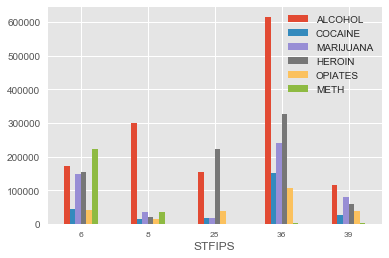

In [48]:
#ethnic and sub1
plt.figure()
#df5 = df[df['SUB1'].isin([2,5,4,10,7,3])] #top 6 substances in order
df5 = df[df['SUB1'].isin([2,3,4,5,7,10])] #top 6 substances

df5 = df5[df5['STFIPS'].isin([36,6,25,39,8])] #5 most admitted states in order
df5 = df5[df5['STFIPS'].isin([6,8,25,36,39])] #


df5 = df5.groupby(['STFIPS'])['SUB1'].value_counts().unstack()#.reset_index(name="count")

df5.plot(kind='bar')
#print (df5.head(12))
#plt.title('Number of Substance by Year')

ax = plt.gca() # grab the current axis
ax.set_xticklabels(["American Indian","African","White","Asian"]) 
plt.xticks(fontsize='small')
plt.xticks(rotation='horizontal')
plt.legend(['ALCOHOL', 'COCAINE', 'MARIJUANA', 'HEROIN', 'OPIATES','METH'])

plt.show()

SUB1       2       3       4        5       7       10
RACE                                                  
2      121907    5484   28988    13040   14246   16661
4      627801  305726  506879   230799   35195   21703
5     2373708  263301  805797  1107423  735263  447750
13      20479    2604   10362     5831    2712   11488


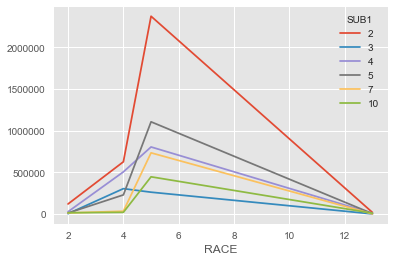

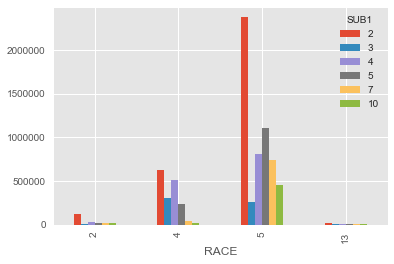

In [19]:
#race and sub1
plt.figure()
df5 = df[df['SUB1'].isin([2,5,4,10,7,3])]
df5 = df5[df5['RACE'].isin([5,4,2,13])]

df5 = df5.groupby(['RACE'])['SUB1'].value_counts().unstack()#.reset_index(name="count")

df5.plot(kind='bar')
print (df5.head(12))
#plt.title('Number of Substance by Year')

#ax = plt.gca() # grab the current axis
#ax.set_xticks([2,4,6]) # choose which x locations to have ticks
#ax.set_xticklabels(["12-14","18-20","25-29","35-39","45-49","55 AND OVER"]) 
plt.show()
# set the labels to display at those ticks

df6 = df5

In [20]:
print df6
df7 = df6.sum(axis=1)
print df7
df8 = df6
for i in [2,5,4,10,7,3]:
    df8[i] = df6[i] / df7
    
df8.rename(columns={2:'ALCOHOL', 5:'HEROIN', 4:'MARIJUANA', 10:'METH', 7:'OPIATES', 3:'COCAINE'},inplace=True)
#df8.rename(index={1:'MALE', 2:'FEMALE'},inplace=True)
#print (df8)

SUB1       2       3       4        5       7       10
RACE                                                  
2      121907    5484   28988    13040   14246   16661
4      627801  305726  506879   230799   35195   21703
5     2373708  263301  805797  1107423  735263  447750
13      20479    2604   10362     5831    2712   11488
RACE
2      200326
4     1728103
5     5733242
13      53476
dtype: int64


In [52]:
print df8

SUB1   ALCOHOL   COCAINE  MARIJUANA    HEROIN   OPIATES      METH
RACE                                                             
2     0.608543  0.027375   0.144704  0.065094  0.071114  0.083169
4     0.363289  0.176914   0.293315  0.133556  0.020366  0.012559
5     0.414025  0.045925   0.140548  0.193158  0.128246  0.078097
13    0.382957  0.048695   0.193769  0.109040  0.050714  0.214825


Percentage Chart for `Race and Substance Abuse Problem`

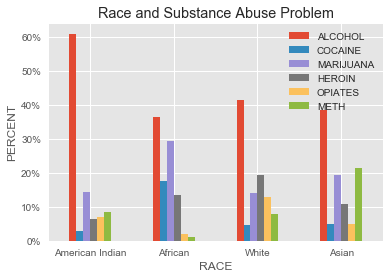

In [62]:
from matplotlib.ticker import FuncFormatter

plt.figure()

#df2['sub1_ratio'] = (df2.groupby(['YEAR'])['SUB1'] / df2.groupby(['YEAR']).sum())

ax = df8.plot(kind='bar')
ax.legend(bbox_to_anchor=(1.1, 1.1))

#df6.groupby(['YEAR']).plot.bar(x='SUB1', y='count')
#df6.groupby(['YEAR','SUB1'])['SUB1'].sum().plot.bar()

ax = plt.gca() # grab the current axis
ax.set(xlabel="RACE", ylabel="PERCENT")
#ax.set_xticks([2,4,6]) # choose which x locations to have ticks
#ax.set_xticklabels(["ANXIETY DISORDER","DEPRESSIVE DISORDER","SCHIZOPHRENIA","BIPOLAR DISORDER","ATTENTION DEFICIT"]) 
#ax.set_xticklabels(["ANXIETY","DEPRESS","SCHIZOPHRENIA","BIPOLAR","ATTENTION DEFICIT"]) 
ax.set_xticklabels(["American Indian","African","White","Asian"]) 
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

#df6.plot(kind='bar')
#pd.crosstab(df5['YEAR'],df5['SUB1']).plot.bar()
plt.title('Race and Substance Abuse Problem')
#plt.xticks(fontsize='small')
plt.xticks(rotation='horizontal')
plt.legend(['ALCOHOL', 'COCAINE', 'MARIJUANA', 'HEROIN', 'OPIATES','METH'])
plt.show()

In [30]:
#print df.query('STFIPS==39').query('DAYWAIT >= 365')[['DAYWAIT','CASEID']].head(5) #ohio = 39
#print df.query('STFIPS==39').query('DAYWAIT >= 900')[['DAYWAIT','CASEID']].head(5)

#employ and race
print df.query('RACE==2')['EMPLOY'].value_counts()#amercian indian
print df.query('RACE==5')['EMPLOY'].value_counts()#white
print df.query('RACE==4')['EMPLOY'].value_counts()#african

 3    96494
 4    68940
 1    22791
 2    14323
-9     3171
Name: EMPLOY, dtype: int64
 3    2364114
 4    2038904
 1    1010305
 2     480241
-9     126533
Name: EMPLOY, dtype: int64
 4    825362
 3    699713
 1    155909
 2     93617
-9     22269
Name: EMPLOY, dtype: int64


investigate unusual days waiting values

In [78]:
#print df.query('STFIPS==39').query('DAYWAIT >= 900')['DSMCRIT'].value_counts() #ohio = 39
print df.query('STFIPS==39').query('DAYWAIT >= 90')['HLTHINS'].value_counts() #ohio = 39
print df.query('STFIPS==39').query('DAYWAIT >= 90')['PRIMPAY'].value_counts() #ohio = 39

#print df.query('DAYWAIT >= 90')['HLTHINS'].value_counts() #ohio = 39
print df.query('DAYWAIT >= 365')['HLTHINS'].value_counts() #ohio = 39


-9    18969
Name: HLTHINS, dtype: int64
 4    6097
 5    5930
 9    2799
 1    2315
 2     683
 8     590
 3     550
-9       5
Name: PRIMPAY, dtype: int64
-9    13524
 4      656
 2      198
 3      138
 1      109
Name: HLTHINS, dtype: int64
